In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import sys
import curvedsky as cs
sys.path.append('../')

In [2]:
from utils import cli,ini_full
from tqdm import tqdm

In [3]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG
from filtering import Filtering
from quest import Reconstruction

In [61]:
filt = Filtering.from_ini('LB_FG0.ini')
sim = SimExperimentFG.from_ini('LB_FG0.ini')

DATABASE INFO: File - /global/u2/l/lonappan/workspace/LBlens/Data/surveys.pkl
SIMULATION INFO: CMB Realisation - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
SIMULATION INFO: Foreground - /global/cscratch1/sd/lonappan/S4BIRD/FG
SIMULATION INFO: Foreground Model - s0d0
SIMULATION INFO: Foreground included - False
SIMULATION INFO: Number of simulations - 500
SIMULATION INFO: Frequency range - 0.0 GHz - 500.0 GHz
SIMULATION INFO: NSIDE - 512
SIMULATION INFO: Output folder - /global/cscratch1/sd/lonappan/S4BIRD/DELL_noisefix/noFG
FILTERING INFO: Outfolder - /global/cscratch1/sd/lonappan/S4BIRD/DELL_noisefix/noFG/Filtered
FILTERING INFO: Mask path - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_binary.fits
FILTERING INFO: fsky - 0.7990690867106119
FILTERING INFO: Beam - 15.0 arcmin
DATABASE INFO: File - /global/u2/l/lonappan/workspace/LBlens/Data/surveys.pkl
SIMULATION INFO: CMB Realisatio

/global/u2/l/lonappan/workspace/LBlens/Notebooks/../filtering.py:132: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/(self.cl_len[2,:]  + nb))


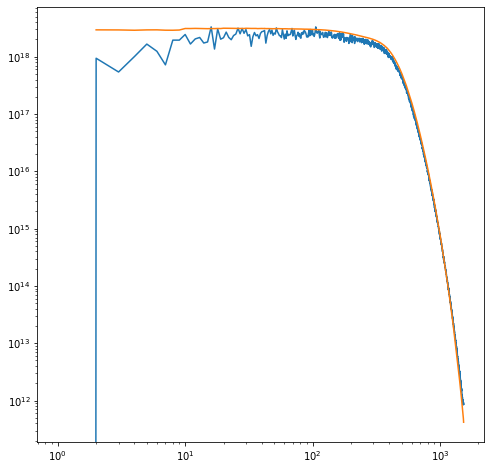

In [63]:
filt.plot_cinv(0)

In [39]:
cmb,noise,we = sim.get_cmb_alms(0)

(2, 2215.204366530363)

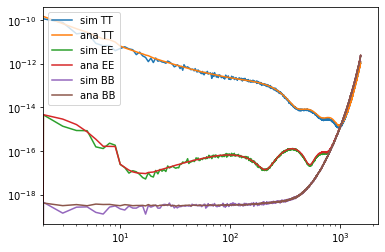

In [30]:
plt.loglog(hp.alm2cl(cmb[0])/sim.Tcmb**2,label='sim TT')
plt.loglog(sim.cl_len[0,:] + hp.alm2cl(noise[0])/sim.Tcmb**2,label='ana TT')
plt.loglog(hp.alm2cl(cmb[1])/sim.Tcmb**2,label='sim EE')
plt.loglog(sim.cl_len[1,:] + hp.alm2cl(noise[1])/sim.Tcmb**2,label='ana EE')
plt.loglog(hp.alm2cl(cmb[2])/sim.Tcmb**2,label='sim BB')
plt.loglog(sim.cl_len[2,:] + hp.alm2cl(noise[2])/sim.Tcmb**2,label='ana BB')
plt.legend()
plt.xlim(2,None)

In [43]:

cmb,noise,we = sim.get_cmb_alms(0)
bl = hp.gauss_beam(np.radians(15/60),lmax=filt.lmax)
Tin,Ein,Bin = cmb
hp.almxfl(Tin,bl,inplace=True)
hp.almxfl(Ein,bl,inplace=True)
hp.almxfl(Bin,bl,inplace=True)



array([ 0.        +0.j        ,  0.        +0.j        ,
       -0.00053743+0.j        , ..., -0.01190911+0.01768035j,
        0.11415877-0.02201299j,  0.03237312+0.02033166j])

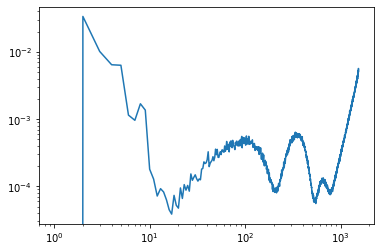

In [44]:
plt.loglog(hp.alm2cl(Ein))

In [45]:
TQU = hp.alm2map([Tin,Ein,Bin],filt.nside)


In [46]:
mask = filt.mask
QU = np.reshape(np.array((TQU[1]*mask,TQU[2]*mask)),
                            (2,1,hp.nside2npix(filt.nside)))/filt.Tcmb

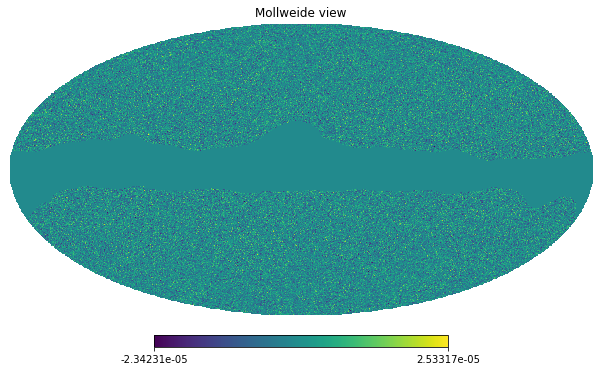

In [47]:
hp.mollview(QU[0][0])

In [48]:
_,ne,nb = filt.sim_lib.noise_spectra(500)
ne *= bl**2
nb *= bl**2
NL = np.reshape(np.array((cli(ne[:filt.lmax+1]),
                          cli(nb[:filt.lmax+1]))),(2,1,filt.lmax+1))

Bl = np.reshape(bl,(1,filt.lmax+1))

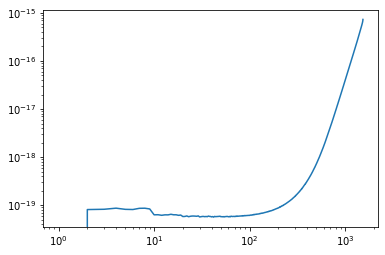

In [53]:
plt.loglog(nb)

In [50]:
E,B = cs.cninv.cnfilter_freq(2,1,filt.nside,filt.lmax,filt.cl_len[1:3,:],
                            Bl, filt.ninv,QU,chn=1,itns=[1000],
                            eps=[1e-5],ro=10,inl=NL,stat='stat.txt')

In [54]:
Qc,Uc = cs.utils.hp_alm2map_spin(filt.nside, filt.lmax, filt.lmax, 2,E, B)

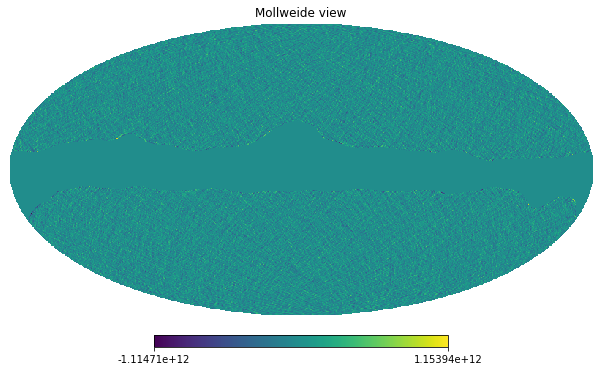

In [55]:
hp.mollview(Qc)

/tmp/ipykernel_23174/2530256462.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/filt.NL[0][0])


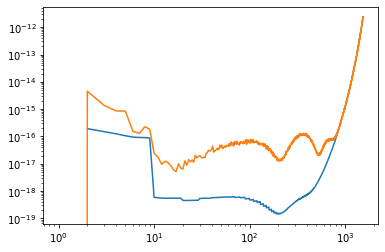

In [21]:
plt.loglog(1/filt.NL[0][0])
plt.loglog(hp.alm2cl(cmb[1])/sim.Tcmb**2,label='sim BB')

In [56]:
_,Ne,Nb = filt.sim_lib.noise_spectra(500)

/tmp/ipykernel_27033/2331367638.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/(filt.cl_len[2,:]+Nb),label='cinv B ana_new')


(100000000000.0, 7.346357034423131e+18)

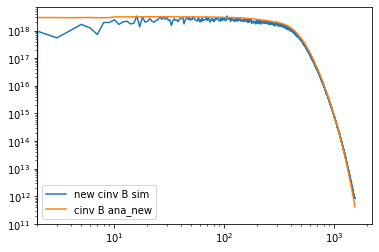

In [58]:
clb = cs.utils.alm2cl(filt.lmax,B)
plt.loglog(clb,label='new cinv B sim')
plt.loglog(1/(filt.cl_len[2,:]+Nb),label='cinv B ana_new')
plt.legend()
plt.xlim(2,None)
plt.ylim(1e11,None)


In [104]:
filt = Filtering.from_ini('../LB_FG0_toshiya.ini')

DATABASE INFO: File - /global/u2/l/lonappan/workspace/LBlens/surveys.pkl
SIMULATION INFO: CMB Realisation - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
SIMULATION INFO: Foreground - /global/cscratch1/sd/lonappan/S4BIRD/FG
SIMULATION INFO: Foreground Model - s0d0
SIMULATION INFO: Foreground included - False
SIMULATION INFO: Number of simulations - 500
SIMULATION INFO: Frequency range - 0.0 GHz - 500.0 GHz
SIMULATION INFO: NSIDE - 512
SIMULATION INFO: Output folder - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/DELL/noFG
FILTERING INFO: Outfolder - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/DELL/noFG/Filtered_fullsky
FILTERING INFO: Mask path - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_binary.fits
FILTERING INFO: fsky - 1.0


In [105]:
Eo,Bo = filt.cinv_EB(0)